#load the data

In [ ]:

import pandas as pd
import numpy as np

# Load the dataset
path_to_file = 'messy_data.csv'
data = pd.read_csv(path_to_file)


# Display dataset information
data.head()
data.info()
data.describe()



#2) clean the missing value

In [6]:
cleaned_data = data.copy().dropna()

# Fix inconsistent entries
data_format_fixed = data.copy()
data_format_fixed['sex'] = data_format_fixed['sex'].apply(lambda x: 'female' if 'F' in x or 'f' in x else 'male')


#3) standardize columns


In [3]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
print("Standardized Columns:")
print(data.columns)

Standardized Columns:
Index(['survived', 'deck', 'embarked', 'pclass', 'embark_town', 'sex',
       'adult_male', 'who', 'wspd', 'lfwa', 'class', 'tprc', 'sibsp', 'age',
       'alone', 'fare', 'parch'],
      dtype='object')


#4)detect outliers


In [4]:
# Detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1                  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers are values outside the IQR bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Detect outliers in a numerical column named 'age'
if 'age' in data.columns:  # Replace 'age' with your column name
    outliers = detect_outliers_iqr(data, 'age')
    print("Outliers in 'age':")
    print(outliers)
else:
    print("Column 'age' not found in the dataset.")


Outliers in 'age':
     survived deck embarked  pclass  embark_town   sex  adult_male  who  wspd  \
96          0    A        C     1.0    Cherbourg  male        True  man  71.0   
116         0  NaN        Q     3.0   Queenstown  male        True  man  70.5   
493         0  NaN        C     1.0    Cherbourg  male        True  man  81.0   
672         0  NaN        S     2.0  Southampton  male        True  man  70.0   
745         0    B        S     NaN  Southampton  male        True  man  70.0   
851         0  NaN        S     3.0  Southampton  male        True  man  84.0   

      lfwa   class      tprc  sibsp   age  alone     fare  parch  
96   142.0   First  105.9626    0.0  71.0   True  34.6542    0.0  
116  141.0   Third   25.2500    0.0  70.5   True   7.7500    0.0  
493  142.0   First  150.5126    0.0  71.0   True  49.5042    NaN  
672  140.0  Second   33.5000    0.0  70.0   True  10.5000    0.0  
745  140.0   First  215.0000    1.0  70.0  False  71.0000    1.0  
851  148.0 

#5) data visualization


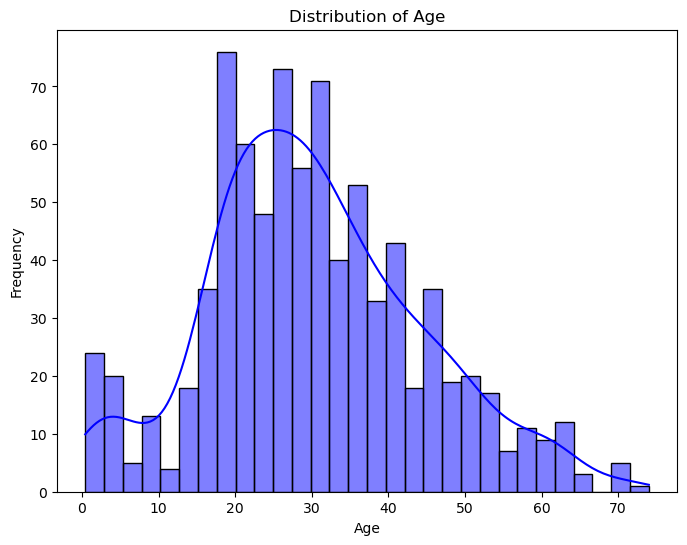

In [9]:
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns           # For advanced visualizations
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#6)save_clean_data

In [7]:
# Save the cleaned data to a new CSV file
cleaned_data.to_csv("cleaned_data.csv", index=False)

print("Cleaned data saved successfully!")


Cleaned data saved successfully!
